# Call Center Data - Exploratory Data Analysis

This notebook performs comprehensive EDA on the call center dataset to understand patterns, trends, and relationships in the data.

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Load Data

In [3]:
df = pd.read_csv(
    '../data/processed/call_data_clean.csv', 
    parse_dates=['Date'], 
    index_col='Date'
)

print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

Data shape: (1247, 8)
Date range: 2022-01-01 00:00:00 to 2025-05-31 00:00:00


## Time Series Plot

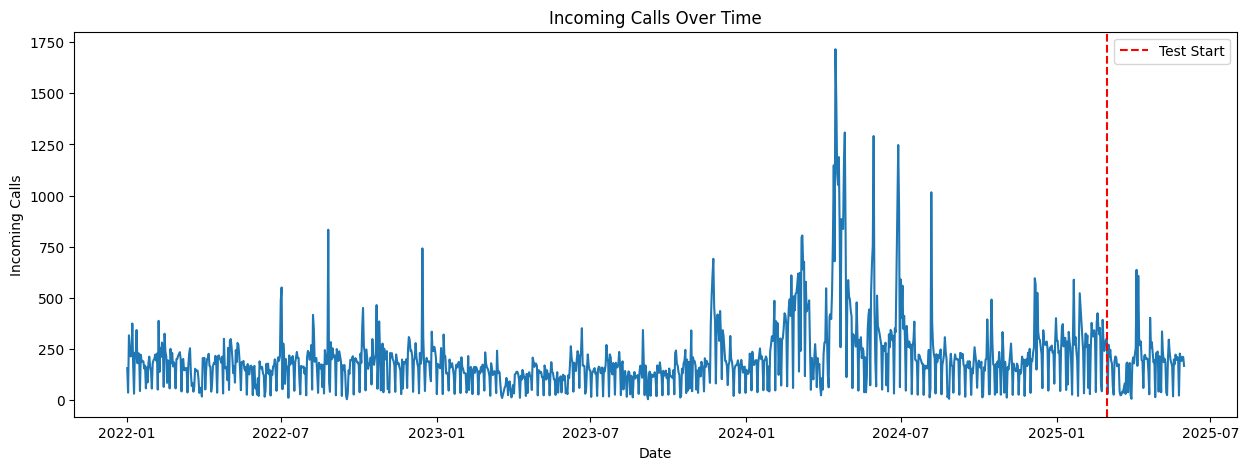

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Incoming Calls'])
plt.axvline(x=pd.to_datetime('2025-03-01'), color='r', linestyle='--', label='Test Start')
plt.title('Incoming Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Incoming Calls')
plt.legend()
plt.show()

## Decomposition

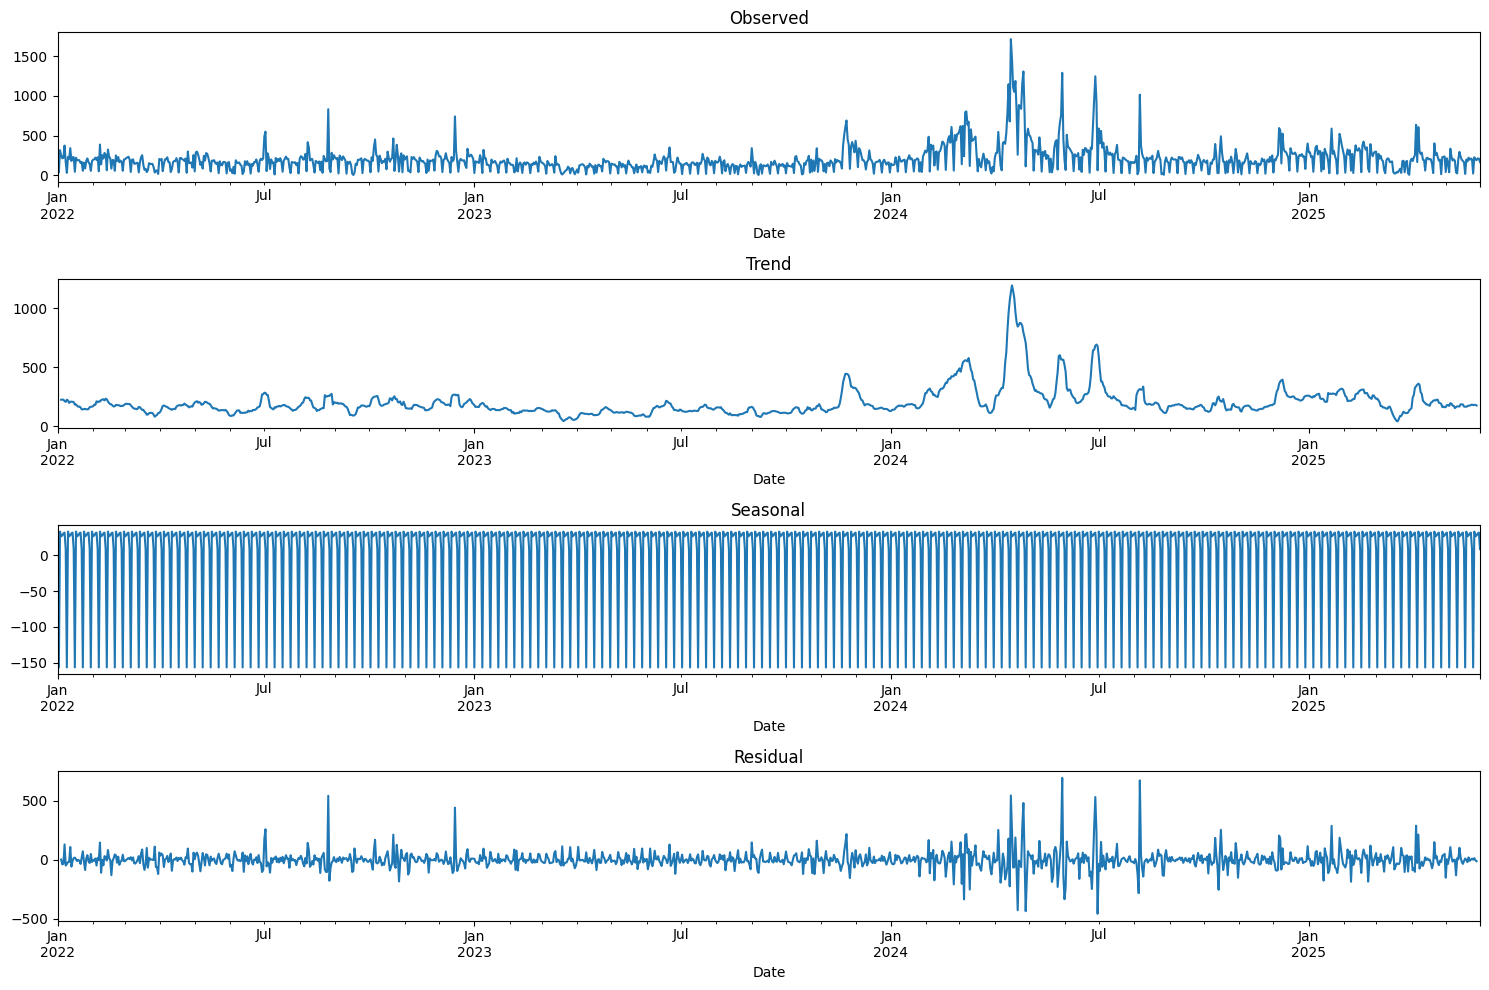

In [5]:
decomposition = seasonal_decompose(
    df['Incoming Calls'], 
    model='additive', 
    period=7  # weekly seasonality
)

fig, axes = plt.subplots(4, 1, figsize=(15, 10))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

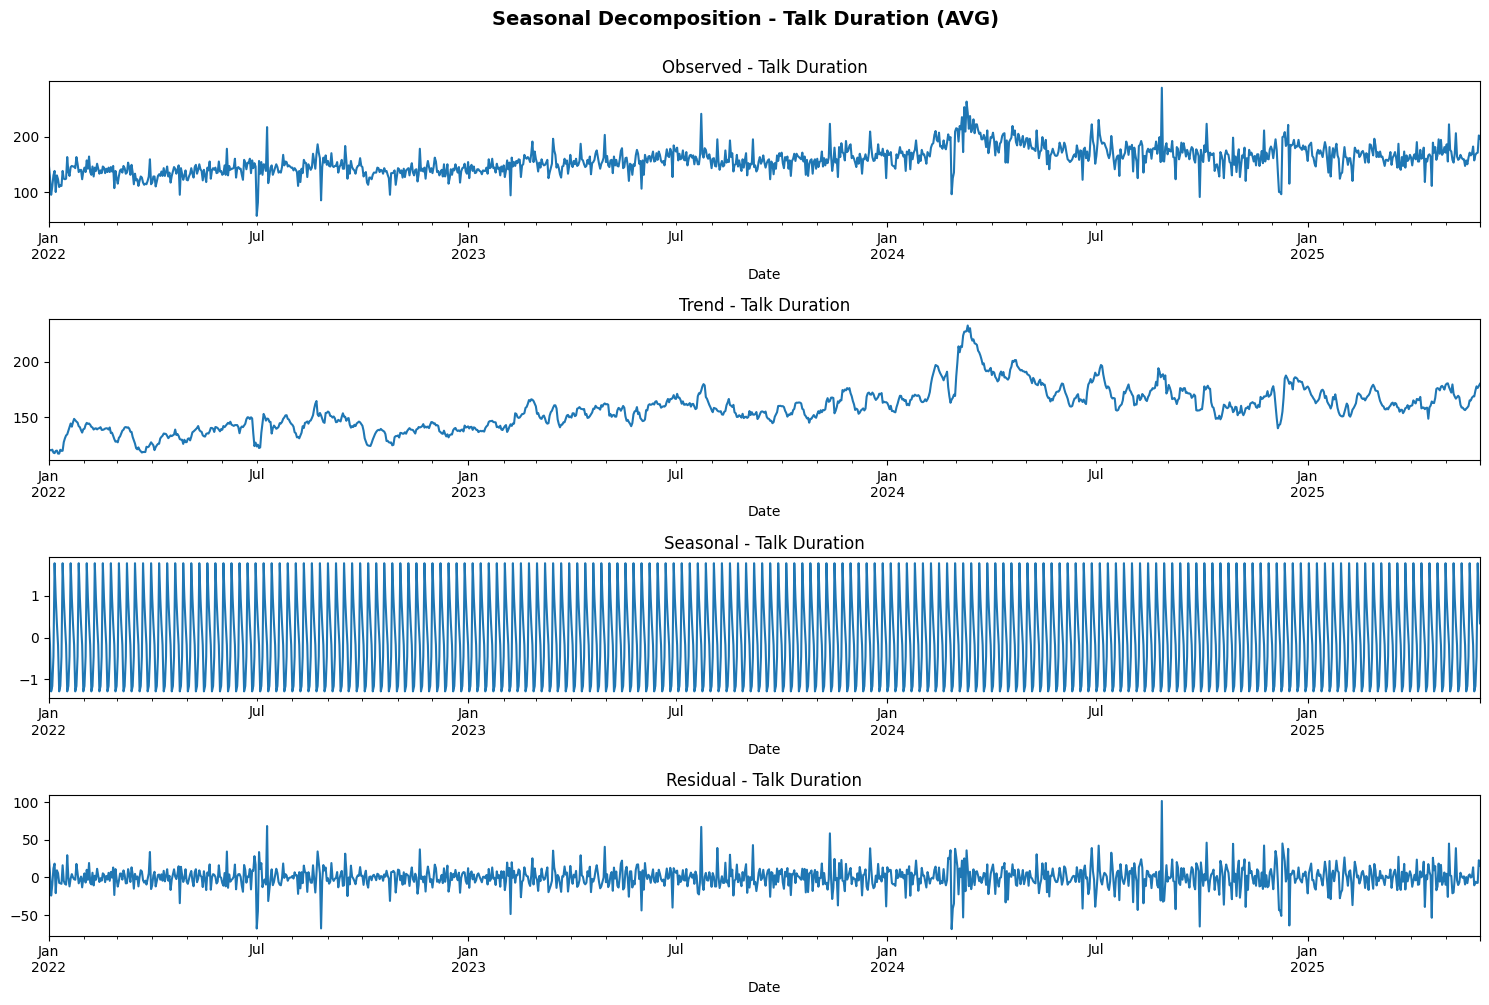

In [13]:
decomposition_talk = seasonal_decompose(
    df["Talk Duration (AVG)"],
    model="additive",
    period=7,
    extrapolate_trend="freq",
)

fig, axes = plt.subplots(4, 1, figsize=(15, 10))
decomposition_talk.observed.plot(ax=axes[0], title='Observed - Talk Duration')
decomposition_talk.trend.plot(ax=axes[1], title='Trend - Talk Duration')
decomposition_talk.seasonal.plot(ax=axes[2], title='Seasonal - Talk Duration')
decomposition_talk.resid.plot(ax=axes[3], title='Residual - Talk Duration')
plt.suptitle('Seasonal Decomposition - Talk Duration (AVG)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Day of Week Analysis

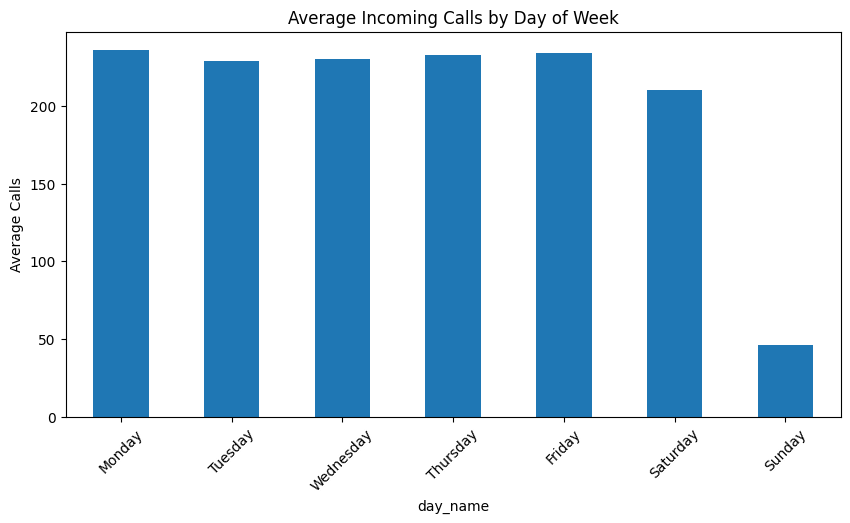

In [7]:
df['day_of_week'] = df.index.dayofweek
df['day_name'] = df.index.day_name()

# Average by day of week
day_avg = df.groupby('day_name')['Incoming Calls'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
day_avg.plot(kind='bar')
plt.title('Average Incoming Calls by Day of Week')
plt.ylabel('Average Calls')
plt.xticks(rotation=45)
plt.show()

## Monthly Trends 

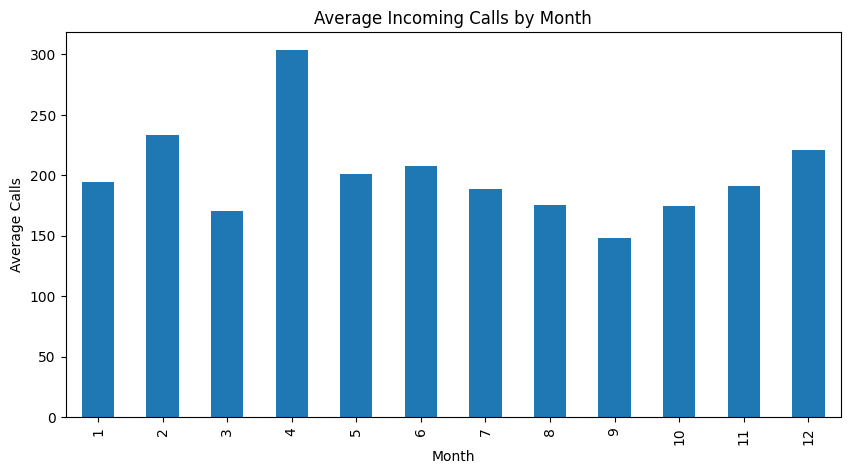

In [8]:
df['month'] = df.index.month
monthly_avg = df.groupby('month')['Incoming Calls'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Incoming Calls by Month')
plt.xlabel('Month')
plt.ylabel('Average Calls')
plt.show()

## Autocorrelation - helps in linear autoregression models (ARMA, ARIMA, etc)

## Incoming Calls

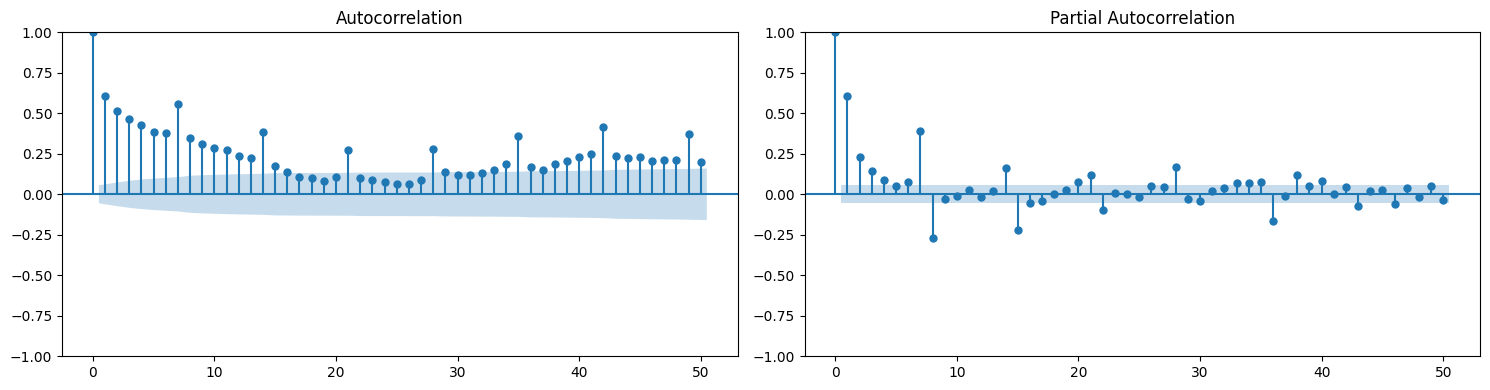

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df['Incoming Calls'].dropna(), lags=50, ax=axes[0])
plot_pacf(df['Incoming Calls'].dropna(), lags=50, ax=axes[1])
plt.tight_layout()
plt.show()

ACF (left) : 
- Strong positive correlation at lag 1, gradually decaying
- Repeating spikes every ~7 lags → confirms weekly seasonality
  

## Talk Duration

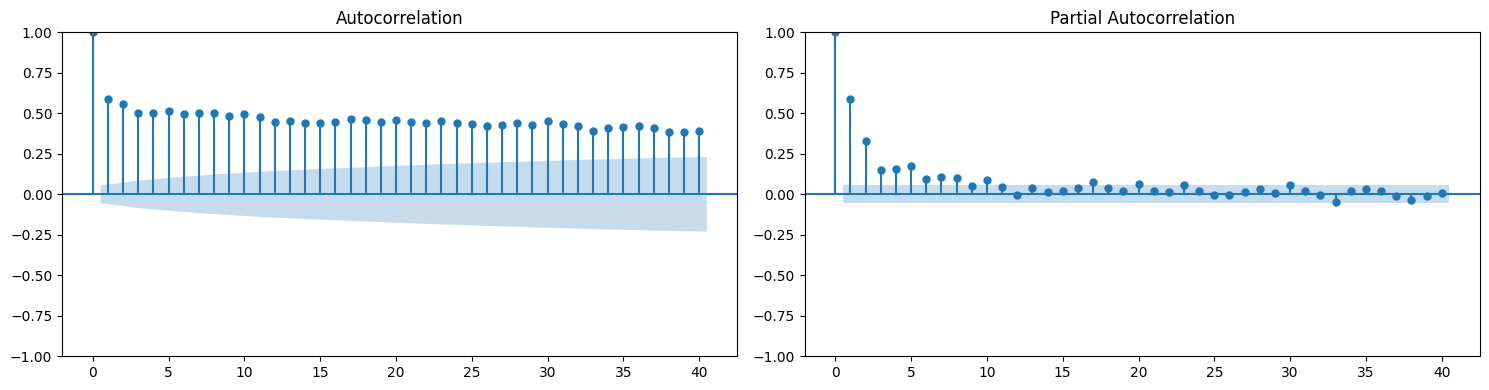

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# ACF for Talk Duration
plot_acf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[0])
# PACF for Talk Duration
plot_pacf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[1])

plt.tight_layout()
plt.show()

## Hypothesis: We can find repeating pattern in our data  

### 8.2 Monthly and Quarterly Patterns

### 8.4 Year-over-Year Comparison (2023, 2024, 2025)

Compare seasonal patterns across different years to identify consistent trends and anomalies.

Year-over-Year Data Summary:
2023: 365 days (2023-01-01 to 2023-12-31)
2024: 366 days (2024-01-01 to 2024-12-31)
2025: 151 days (2025-01-01 to 2025-05-31)


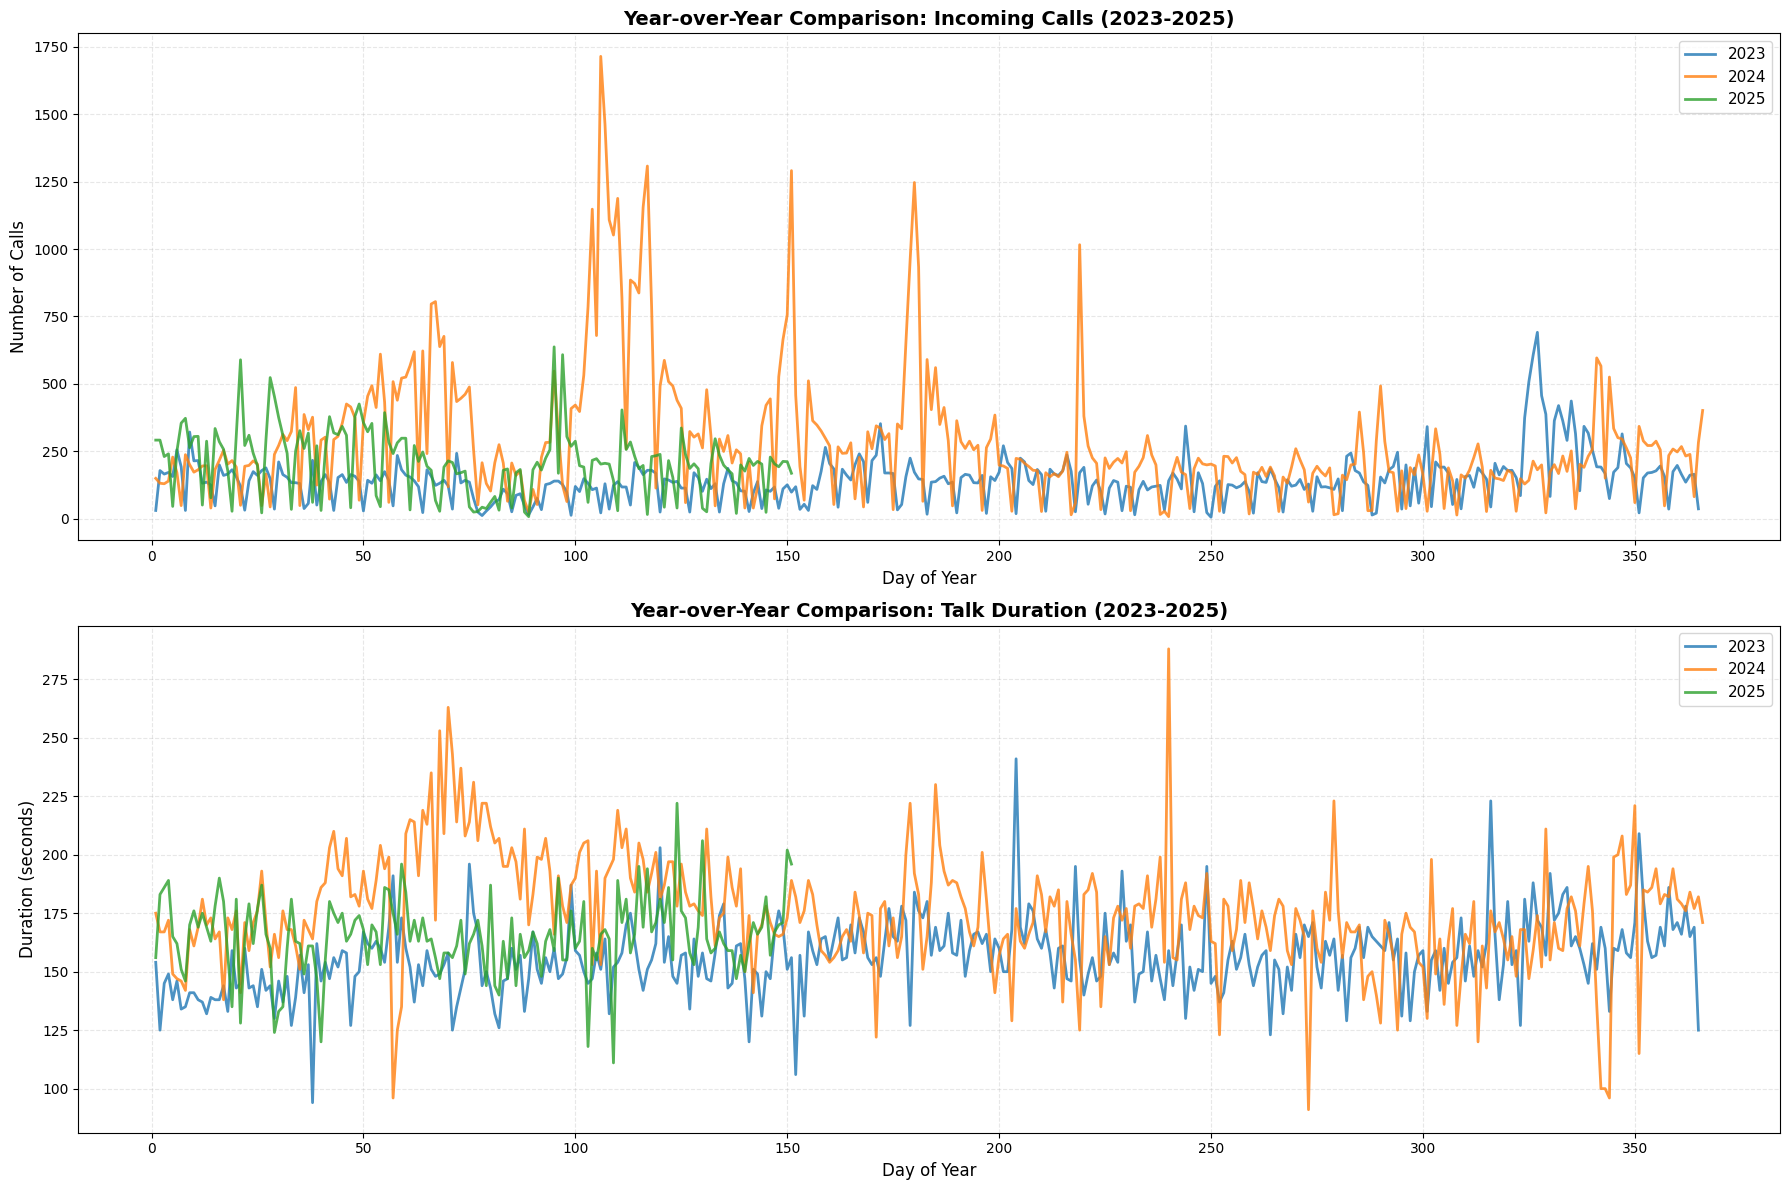

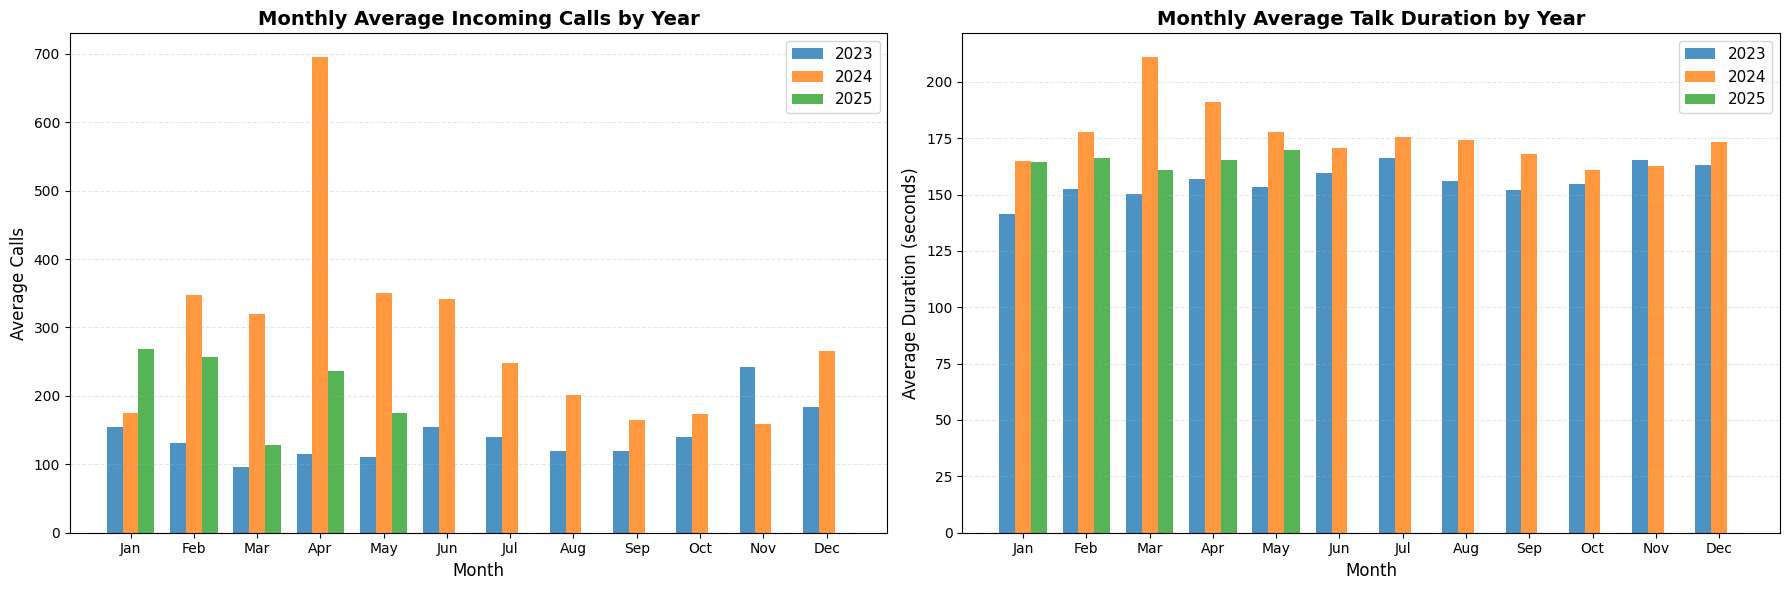

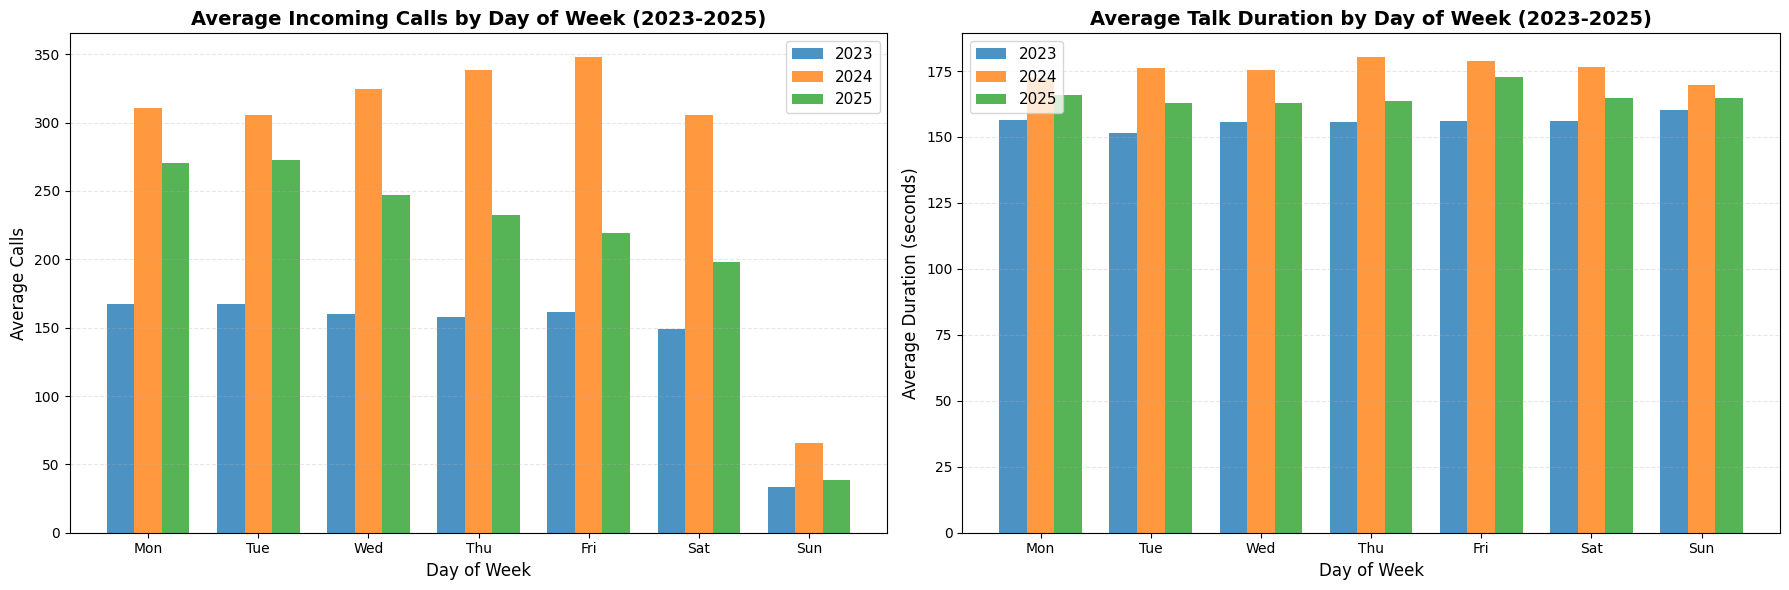


STATISTICAL SUMMARY BY YEAR

  Year  Days  Avg Incoming Calls  Std Incoming Calls  Avg Talk Duration (s)  Std Talk Duration (s)
 2023   365          141.953425           86.250883             155.928767              15.745237
 2024   366          285.650273          245.761201             175.571038              24.488949
 2025   151          211.688742          122.563191             165.350993              16.300592

YEAR-OVER-YEAR GROWTH

Incoming Calls:
  2023 → 2024: +101.23%
  2024 → 2025: -25.89%

Talk Duration:
  2023 → 2024: +12.60%
  2024 → 2025: -5.82%


In [15]:
import numpy as np

# Filter data for specific years
df_2023 = df[df.index.year == 2023].copy()
df_2024 = df[df.index.year == 2024].copy()
df_2025 = df[df.index.year == 2025].copy()

# Add temporal features for each year's data
for df_year in [df_2023, df_2024, df_2025]:
    df_year["DayOfYear"] = df_year.index.dayofyear
    df_year["Month"] = df_year.index.month
    df_year["DayName"] = df_year.index.day_name()

print("Year-over-Year Data Summary:")
print(f"2023: {len(df_2023)} days ({df_2023.index.min().date()} to {df_2023.index.max().date()})")
print(f"2024: {len(df_2024)} days ({df_2024.index.min().date()} to {df_2024.index.max().date()})")
print(f"2025: {len(df_2025)} days ({df_2025.index.min().date()} to {df_2025.index.max().date()})")

# ============================================================
# 1. Line Plot Comparison - Incoming Calls
# ============================================================
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Incoming Calls by Day of Year
axes[0].plot(df_2023["DayOfYear"], df_2023["Incoming Calls"], label="2023", color="#1f77b4", linewidth=2, alpha=0.8)
axes[0].plot(df_2024["DayOfYear"], df_2024["Incoming Calls"], label="2024", color="#ff7f0e", linewidth=2, alpha=0.8)
axes[0].plot(df_2025["DayOfYear"], df_2025["Incoming Calls"], label="2025", color="#2ca02c", linewidth=2, alpha=0.8)

axes[0].set_title("Year-over-Year Comparison: Incoming Calls (2023-2025)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Year", fontsize=12)
axes[0].set_ylabel("Number of Calls", fontsize=12)
axes[0].legend(fontsize=11, loc="best")
axes[0].grid(alpha=0.3, linestyle="--")

# Talk Duration by Day of Year
axes[1].plot(df_2023["DayOfYear"], df_2023["Talk Duration (AVG)"], label="2023", color="#1f77b4", linewidth=2, alpha=0.8)
axes[1].plot(df_2024["DayOfYear"], df_2024["Talk Duration (AVG)"], label="2024", color="#ff7f0e", linewidth=2, alpha=0.8)
axes[1].plot(df_2025["DayOfYear"], df_2025["Talk Duration (AVG)"], label="2025", color="#2ca02c", linewidth=2, alpha=0.8)

axes[1].set_title("Year-over-Year Comparison: Talk Duration (2023-2025)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Day of Year", fontsize=12)
axes[1].set_ylabel("Duration (seconds)", fontsize=12)
axes[1].legend(fontsize=11, loc="best")
axes[1].grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 2. Monthly Average Comparison
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Incoming Calls - Monthly Average by Year
monthly_calls_2023 = df_2023.groupby("Month")["Incoming Calls"].mean()
monthly_calls_2024 = df_2024.groupby("Month")["Incoming Calls"].mean()
monthly_calls_2025 = df_2025.groupby("Month")["Incoming Calls"].mean()

x = np.arange(1, 13)
width = 0.25

axes[0].bar(x - width, monthly_calls_2023.reindex(range(1, 13), fill_value=0), width, label="2023", color="#1f77b4", alpha=0.8)
axes[0].bar(x, monthly_calls_2024.reindex(range(1, 13), fill_value=0), width, label="2024", color="#ff7f0e", alpha=0.8)
axes[0].bar(x + width, monthly_calls_2025.reindex(range(1, 13), fill_value=0), width, label="2025", color="#2ca02c", alpha=0.8)

axes[0].set_title("Monthly Average Incoming Calls by Year", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Month", fontsize=12)
axes[0].set_ylabel("Average Calls", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
axes[0].legend(fontsize=11)
axes[0].grid(axis="y", alpha=0.3, linestyle="--")

# Talk Duration - Monthly Average by Year
monthly_talk_2023 = df_2023.groupby("Month")["Talk Duration (AVG)"].mean()
monthly_talk_2024 = df_2024.groupby("Month")["Talk Duration (AVG)"].mean()
monthly_talk_2025 = df_2025.groupby("Month")["Talk Duration (AVG)"].mean()

axes[1].bar(x - width, monthly_talk_2023.reindex(range(1, 13), fill_value=0), width, label="2023", color="#1f77b4", alpha=0.8)
axes[1].bar(x, monthly_talk_2024.reindex(range(1, 13), fill_value=0), width, label="2024", color="#ff7f0e", alpha=0.8)
axes[1].bar(x + width, monthly_talk_2025.reindex(range(1, 13), fill_value=0), width, label="2025", color="#2ca02c", alpha=0.8)

axes[1].set_title("Monthly Average Talk Duration by Year", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Average Duration (seconds)", fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
axes[1].legend(fontsize=11)
axes[1].grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 3. Day of Week Comparison Across Years
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Incoming Calls by Day of Week
dow_calls_2023 = df_2023.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)
dow_calls_2024 = df_2024.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)
dow_calls_2025 = df_2025.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)

x = np.arange(len(day_order))
width = 0.25

axes[0].bar(x - width, dow_calls_2023, width, label="2023", color="#1f77b4", alpha=0.8)
axes[0].bar(x, dow_calls_2024, width, label="2024", color="#ff7f0e", alpha=0.8)
axes[0].bar(x + width, dow_calls_2025, width, label="2025", color="#2ca02c", alpha=0.8)

axes[0].set_title("Average Incoming Calls by Day of Week (2023-2025)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Week", fontsize=12)
axes[0].set_ylabel("Average Calls", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[0].legend(fontsize=11)
axes[0].grid(axis="y", alpha=0.3, linestyle="--")

# Talk Duration by Day of Week
dow_talk_2023 = df_2023.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)
dow_talk_2024 = df_2024.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)
dow_talk_2025 = df_2025.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)

axes[1].bar(x - width, dow_talk_2023, width, label="2023", color="#1f77b4", alpha=0.8)
axes[1].bar(x, dow_talk_2024, width, label="2024", color="#ff7f0e", alpha=0.8)
axes[1].bar(x + width, dow_talk_2025, width, label="2025", color="#2ca02c", alpha=0.8)

axes[1].set_title("Average Talk Duration by Day of Week (2023-2025)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Day of Week", fontsize=12)
axes[1].set_ylabel("Average Duration (seconds)", fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[1].legend(fontsize=11)
axes[1].grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 4. Statistical Summary by Year
# ============================================================
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY BY YEAR")
print("=" * 80)

summary_data = []
for year, df_year in [(2023, df_2023), (2024, df_2024), (2025, df_2025)]:
    summary_data.append(
        {
            "Year": year,
            "Days": len(df_year),
            "Avg Incoming Calls": df_year["Incoming Calls"].mean(),
            "Std Incoming Calls": df_year["Incoming Calls"].std(),
            "Avg Talk Duration (s)": df_year["Talk Duration (AVG)"].mean(),
            "Std Talk Duration (s)": df_year["Talk Duration (AVG)"].std(),
        }
    )

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# Calculate Year-over-Year growth
print("\n" + "=" * 80)
print("YEAR-OVER-YEAR GROWTH")
print("=" * 80)
calls_growth_23_24 = (df_2024["Incoming Calls"].mean() - df_2023["Incoming Calls"].mean()) / df_2023["Incoming Calls"].mean() * 100
calls_growth_24_25 = (df_2025["Incoming Calls"].mean() - df_2024["Incoming Calls"].mean()) / df_2024["Incoming Calls"].mean() * 100

talk_growth_23_24 = (df_2024["Talk Duration (AVG)"].mean() - df_2023["Talk Duration (AVG)"].mean()) / df_2023["Talk Duration (AVG)"].mean() * 100
talk_growth_24_25 = (df_2025["Talk Duration (AVG)"].mean() - df_2024["Talk Duration (AVG)"].mean()) / df_2024["Talk Duration (AVG)"].mean() * 100

print("\nIncoming Calls:")
print(f"  2023 → 2024: {calls_growth_23_24:+.2f}%")
print(f"  2024 → 2025: {calls_growth_24_25:+.2f}%")

print("\nTalk Duration:")
print(f"  2023 → 2024: {talk_growth_23_24:+.2f}%")
print(f"  2024 → 2025: {talk_growth_24_25:+.2f}%")

### 8.3 Heatmap: Day of Week vs Month Patterns

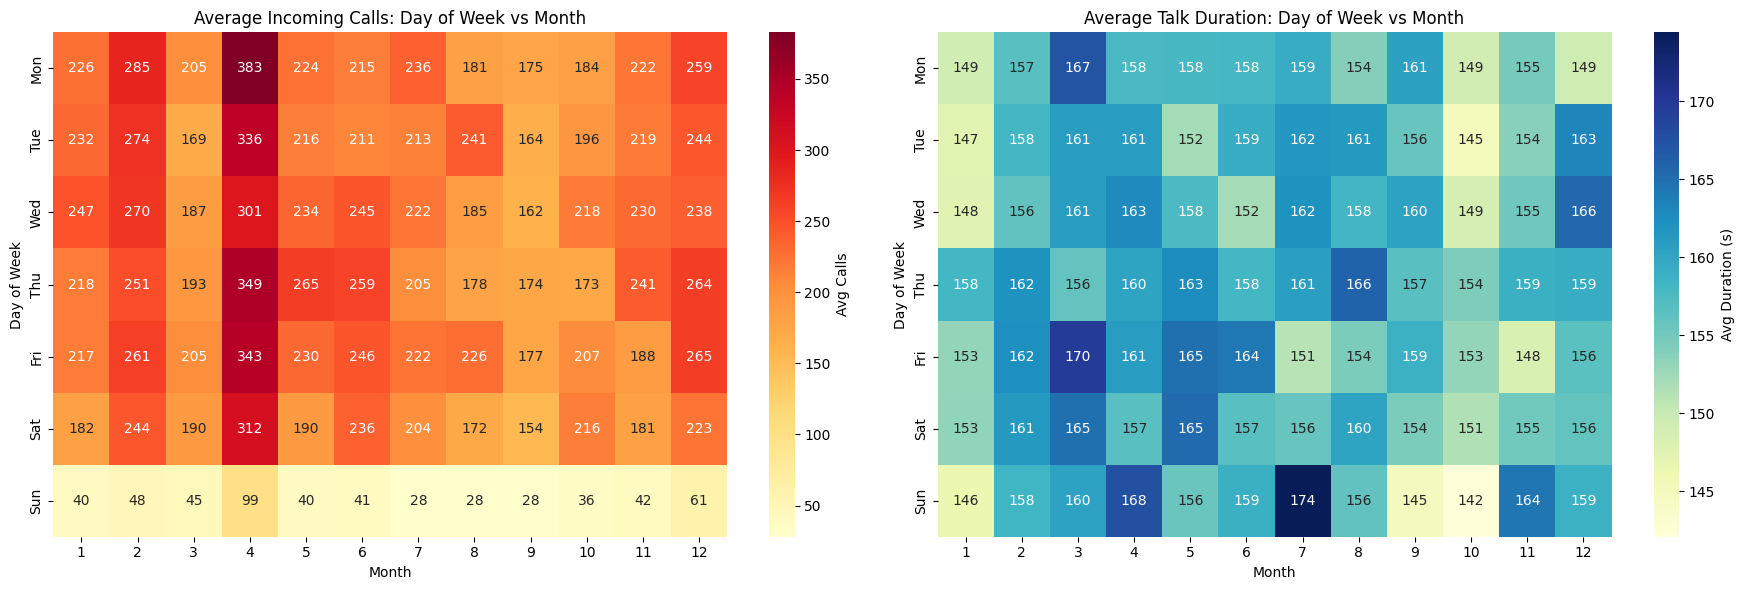

In [16]:
# Create heatmaps to visualize patterns across multiple dimensions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap: Incoming Calls by Day of Week and Month
pivot_calls = df.pivot_table(values="Incoming Calls", index="DayOfWeek", columns="Month", aggfunc="mean")
pivot_calls.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_calls,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    ax=axes[0],
    cbar_kws={"label": "Avg Calls"},
)
axes[0].set_title("Average Incoming Calls: Day of Week vs Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Day of Week")

# Heatmap: Talk Duration by Day of Week and Month
pivot_talk = df.pivot_table(
    values="Talk Duration (AVG)",
    index="DayOfWeek",
    columns="Month",
    aggfunc="mean",
)
pivot_talk.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_talk,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    ax=axes[1],
    cbar_kws={"label": "Avg Duration (s)"},
)
axes[1].set_title("Average Talk Duration: Day of Week vs Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Day of Week")

plt.tight_layout()
plt.show()

## 9. Stationarity Testing

Stationarity is crucial for time series modeling. A stationary series has constant mean, variance, and autocorrelation over time.

## 11. Rolling Statistics Analysis

Visualize how mean and standard deviation change over time using rolling windows.

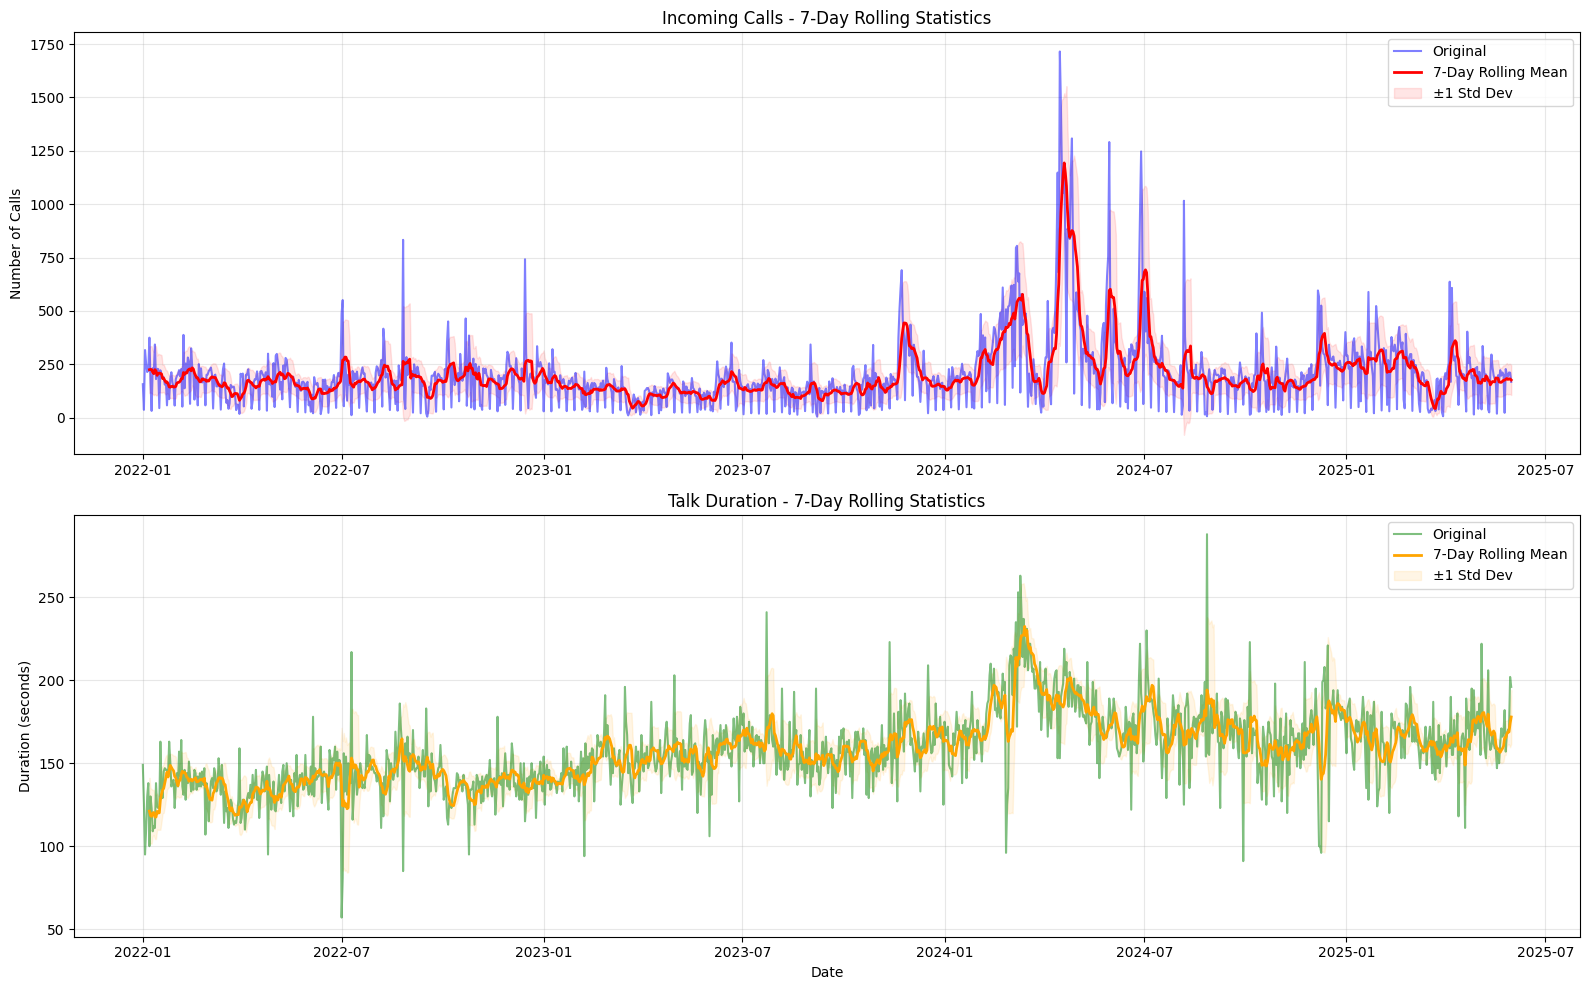

Rolling Statistics Summary:
Window size: 7 days

Incoming Calls - Coefficient of Variation (CV): 0.475
Talk Duration - Coefficient of Variation (CV): 0.089


In [19]:
# Calculate rolling statistics
window_size = 7  # 7-day rolling window

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Incoming Calls - Rolling Statistics
rolling_mean_calls = df["Incoming Calls"].rolling(window=window_size).mean()
rolling_std_calls = df["Incoming Calls"].rolling(window=window_size).std()

axes[0].plot(df.index, df["Incoming Calls"], color="blue", label="Original", alpha=0.5)
axes[0].plot(
    df.index,
    rolling_mean_calls,
    color="red",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[0].fill_between(
    df.index,
    rolling_mean_calls - rolling_std_calls,
    rolling_mean_calls + rolling_std_calls,
    color="red",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[0].set_title(f"Incoming Calls - {window_size}-Day Rolling Statistics")
axes[0].set_ylabel("Number of Calls")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Talk Duration - Rolling Statistics
rolling_mean_talk = df["Talk Duration (AVG)"].rolling(window=window_size).mean()
rolling_std_talk = df["Talk Duration (AVG)"].rolling(window=window_size).std()

axes[1].plot(
    df.index,
    df["Talk Duration (AVG)"],
    color="green",
    label="Original",
    alpha=0.5,
)
axes[1].plot(
    df.index,
    rolling_mean_talk,
    color="orange",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[1].fill_between(
    df.index,
    rolling_mean_talk - rolling_std_talk,
    rolling_mean_talk + rolling_std_talk,
    color="orange",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[1].set_title(f"Talk Duration - {window_size}-Day Rolling Statistics")
axes[1].set_ylabel("Duration (seconds)")
axes[1].set_xlabel("Date")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

cv_calls = rolling_std_calls.mean() / rolling_mean_calls.mean()
cv_talk = rolling_std_talk.mean() / rolling_mean_talk.mean()

print("Rolling Statistics Summary:")
print(f"Window size: {window_size} days")
print(f"\nIncoming Calls - Coefficient of Variation (CV): {cv_calls:.3f}")
print(f"Talk Duration - Coefficient of Variation (CV): {cv_talk:.3f}")